In [1]:
import scirpy as ir

/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import scanpy as sc

In [3]:
from glob import glob
import warnings
import tarfile

import anndata
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc

In [4]:
import muon as mu

In [5]:
import numpy as np

In [7]:
samples = {
    "10mix1": {"group": "10mix"},
    "10mix2": {"group": "10mix"},
    "11mix1": {"group": "11mix"},
    "11mix2": {"group": "11mix"},
    "GF1": {"group": "GF"},
    "GF2": {"group": "GF"},

}    
    
# Create a list of AnnData objects (one for each sample)
adatas_tcr = {}
adatas_gex = {}
for sample, sample_meta in samples.items():
    #adata_gex = sc.read_10x_h5(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/count/sample_filtered_feature_bc_matrix.h5")
    adata_tcr = ir.io.read_10x_vdj(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/vdj_t/filtered_contig_annotations.csv")
    # concatenation only works with unique gene names
    #adata_gex.var_names_make_unique()
    adatas_tcr[sample] = adata_tcr
    #adatas_gex[sample] = adata_gex

/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/anndata/utils.py:334: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)


In [8]:
samples = {
    "10mix-ICI1": {"group": "10mix", "condition":"ICI"},
    "10mix-ICI2": {"group": "10mix","condition":"ICI"},
    "11mix-ICI1": {"group": "11mix","condition":"ICI"},
    "11mix-ICI2": {"group": "11mix","condition":"ICI"},
    "GF-ICI1": {"group": "GF","condition":"No ICI"},
    "GF-ICI2": {"group": "GF","condition":"No ICI"},
    "GF-ICI1-plus": {"group": "GF-plus","condition":"ICI"},
    "GF-ICI2-plus": {"group": "GF-plus","condition":"ICI"},


}    
    
# Create a list of AnnData objects (one for each sample)
adatas_tcr_2021 = {}
#adatas_gex_2021 = {}
for sample, sample_meta in samples.items():
    #adata_gex_2021 = sc.read_10x_h5(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/count/sample_filtered_feature_bc_matrix.h5")
    adata_tcr_2021 = ir.io.read_10x_vdj(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/vdj_t/filtered_contig_annotations.csv")
    # concatenation only works with unique gene names
    #adata_gex_2021.var_names_make_unique()
    adatas_tcr_2021[sample] = adata_tcr_2021
    #adatas_gex_2021[sample] = adata_gex_2021

In [28]:
samples = {
    "10mix-ICI1": {"group": "10mix", "condition":"ICI"},
    "10mix-ICI2": {"group": "10mix","condition":"ICI"},
    "11mix-ICI1": {"group": "11mix","condition":"ICI"},
    "11mix-ICI2": {"group": "11mix","condition":"ICI"},
    "GF-ICI1": {"group": "GF","condition":"No ICI"},
    "GF-ICI2": {"group": "GF","condition":"No ICI"},
    "GF-ICI1-plus": {"group": "GF-plus","condition":"ICI"},
    "GF-ICI2-plus": {"group": "GF-plus","condition":"ICI"},
    "10mix1": {"group": "10mix", "condition":"naive"},
    "10mix2": {"group": "10mix", "condition":"naive"},
    "11mix1": {"group": "11mix", "condition":"naive"},
    "11mix2": {"group": "11xmix", "condition":"naive"},
    "GF1": {"group": "GF", "condition":"naive"},
    "GF2": {"group": "GF", "condition":"naive"},
}    

## Load GEX

In [9]:
adata = sc.read_h5ad("adata_solo_annotated_all.h5ad")

In [10]:
adata_colon = adata[adata.obs["origin"]=="colon"]

In [ ]:
adata_colon.obs.cell_type.replace("COLON_Infg","COLON_Exhausted", inplace=True)

In [12]:
adata_til = adata[adata.obs["origin"]=="til"]

In [ ]:
adata_til.obs.cell_type.replace('MPEC_Effector','MPEC_Exhausted', inplace=True)
adata_til.obs.cell_type.replace('MPEC_Progenitor','MPEC_Naive', inplace=True)
adata_til.obs.cell_type.replace('SLEC_Effector','SLEC_Intermediate', inplace=True)
adata_til.obs.cell_type.replace('SLEC_Inf','SLEC_Intermediate', inplace=True)
adata_til.obs.cell_type.replace('SLEC_Plastic','SLEC_Intermediate', inplace=True)
adata_til.obs.cell_type.replace('SLEC_Terminal','SLEC_Exhausted', inplace=True)
adata_til.obs.cell_type.replace('SLEC_Progenitor','SLEC_Naive', inplace=True)

In [14]:
# Merge anndata objects
adata_tcr = anndata.concat(adatas_tcr, index_unique="_")

In [15]:
# Merge anndata objects
adata_tcr_2021 = anndata.concat(adatas_tcr_2021, index_unique="_")

In [18]:
adata_colon.obs["sample"] = adata_colon.obs_names.to_series().str.split("_", expand=True)[1]

/tmp/ipykernel_1975009/2579415858.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_colon.obs["sample"] = adata_colon.obs_names.to_series().str.split("_", expand=True)[1]


In [22]:
adata_til.obs["sample"] = adata_til.obs_names.to_series().str.split("_", expand=True)[1]

In [23]:
adata_tcr.obs["sample"] = adata_tcr.obs_names.to_series().str.split("_", expand=True)[1]

In [29]:
# Set global met'adata on `mdata.obs`
#adata_tcr.obs["sample"] = adata_tcr.obs_names.to_series().str.split("_", expand=True)[1]
adata_tcr.obs["group"] = adata_tcr.obs["sample"].map(lambda x: samples[x]["group"])
adata_tcr.obs["condition"] = adata_tcr.obs["sample"].map(lambda x: samples[x]["condition"])

In [30]:
adata_tcr.obs

,sample,group,condition
cell_id,,,
AAACCTGAGTCTTGCA-1_10mix1,10mix1,10mix,naive
AAACCTGAGTTAAGTG-1_10mix1,10mix1,10mix,naive
AAACCTGCAGGATCGA-1_10mix1,10mix1,10mix,naive
AAACCTGCATACCATG-1_10mix1,10mix1,10mix,naive
AAACCTGCATTGAGCT-1_10mix1,10mix1,10mix,naive
...,...,...,...
TTTGCGCTCGGTGTTA-1_GF2,GF2,GF,naive
TTTGTCAAGGCTAGCA-1_GF2,GF2,GF,naive
TTTGTCAAGTGCCAGA-1_GF2,GF2,GF,naive


In [31]:
adata_tcr_2021.obs["sample"] = adata_tcr_2021.obs_names.to_series().str.split("_", expand=True)[1]

In [32]:
# Set global met'adata on `mdata.obs`
adata_tcr_2021.obs["sample"] = adata_tcr_2021.obs_names.to_series().str.split("_", expand=True)[1]
adata_tcr_2021.obs["group"] = adata_tcr_2021.obs["sample"].map(lambda x: samples[x]["group"])
adata_tcr_2021.obs["condition"] = adata_tcr_2021.obs["sample"].map(lambda x: samples[x]["condition"])

In [33]:
adata_tcr_2021.obs

,sample,group,condition
cell_id,,,
AAACCTGAGAGCCTAG-1_10mix-ICI1,10mix-ICI1,10mix,ICI
AAACCTGAGGCTCTTA-1_10mix-ICI1,10mix-ICI1,10mix,ICI
AAACCTGAGGGCACTA-1_10mix-ICI1,10mix-ICI1,10mix,ICI
AAACCTGAGGGCTTGA-1_10mix-ICI1,10mix-ICI1,10mix,ICI
AAACCTGAGGTTACCT-1_10mix-ICI1,10mix-ICI1,10mix,ICI
...,...,...,...
TTTGTCATCCAGAGGA-1_GF-ICI2-plus,GF-ICI2-plus,GF-plus,ICI
TTTGTCATCCCTTGCA-1_GF-ICI2-plus,GF-ICI2-plus,GF-plus,ICI
TTTGTCATCTAACTGG-1_GF-ICI2-plus,GF-ICI2-plus,GF-plus,ICI


In [34]:

adata_tcr_merge = anndata.concat([adata_tcr,adata_tcr_2021], index_unique="_")

In [35]:
adata_colon.obs

,_scvi_batch,_scvi_labels,batch,batch_id,cell_type,condition,is_doublet,is_outlier,is_outlier_counts,is_outlier_genes,...,pct_counts_ribo,sample_id,total_counts,total_counts_mt,total_counts_ribo,value,outlier,mt_outlier,ribo_outlier,sample
AAACCTGAGTTAAGTG-1_10mix1,0,0,0,1,COLON_Naive,10mix,singlet,False,False,False,...,13.335417,10mix1,4536.929688,86.830162,605.018494,0,False,False,False,10mix1
AAACCTGCAGGATCGA-1_10mix1,0,0,0,1,COLON_Exhausted,10mix,singlet,False,False,False,...,7.203850,10mix1,8161.037109,75.581802,587.908875,0,False,False,False,10mix1
AAACCTGCATAACCTG-1_10mix1,0,0,0,1,COLON_Exhausted,10mix,singlet,False,False,False,...,5.040699,10mix1,5698.144531,86.354584,287.226318,0,False,False,False,10mix1
AAACCTGCATACCATG-1_10mix1,0,0,0,1,COLON_Exhausted,10mix,singlet,False,False,False,...,3.326039,10mix1,7759.617188,82.344032,258.087860,0,False,False,False,10mix1
AAACCTGGTGTGCCTG-1_10mix1,0,0,0,1,COLON_Intermediate,10mix,singlet,False,False,False,...,10.302308,10mix1,6766.544922,94.393898,697.110291,0,False,False,False,10mix1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTACTGGTTTCGCTC-1_GF2,0,0,5,NaN,COLON_Naive,GF,singlet,False,False,False,...,12.071859,GF2,3564.285889,71.589035,430.275574,0,False,False,False,GF2
TTTATGCAGATATACG-1_GF2,0,0,5,NaN,COLON_Naive,GF,singlet,False,False,False,...,8.211414,GF2,6678.550781,75.765022,548.403503,0,False,False,False,GF2
TTTCCTCAGGAATGGA-1_GF2,0,0,5,NaN,COLON_Exhausted,GF,singlet,False,False,False,...,6.190449,GF2,10238.525391,79.693443,633.810669,0,False,False,False,GF2
TTTGCGCTCAACCATG-1_GF2,0,0,5,NaN,COLON_Naive,GF,singlet,False,False,False,...,6.820618,GF2,7710.675293,75.429436,525.915710,0,False,False,False,GF2


In [36]:
adata_til.obs

,_scvi_batch,_scvi_labels,batch,batch_id,cell_type,condition,is_doublet,is_outlier,is_outlier_counts,is_outlier_genes,...,pct_counts_ribo,sample_id,total_counts,total_counts_mt,total_counts_ribo,value,outlier,mt_outlier,ribo_outlier,sample
AAACCTGAGAGCCTAG-1_10mix_ICI1,0,0,0,ICI1,SLEC_Exhausted,10mix,singlet,False,False,False,...,7.306554,10mix_ICI1,8468.025391,0.000000,618.720886,0,False,False,False,10mix
AAACCTGAGGCTCTTA-1_10mix_ICI1,0,0,0,ICI1,MPEC_Naive,10mix,singlet,False,False,False,...,7.538410,10mix_ICI1,9098.912109,88.787018,685.913269,0,False,False,False,10mix
AAACCTGAGGGCTTGA-1_10mix_ICI1,0,0,0,ICI1,MPEC_Intermediate,10mix,singlet,False,False,False,...,9.105783,10mix_ICI1,7737.306152,76.176064,704.542297,0,False,False,False,10mix
AAACCTGAGGTTACCT-1_10mix_ICI1,0,0,0,ICI1,SLEC_Exhausted,10mix,singlet,False,False,False,...,3.969964,10mix_ICI1,16565.292969,78.500778,657.636169,0,False,False,False,10mix
AAACCTGCAACCGCCA-1_10mix_ICI1,0,0,0,ICI1,SLEC_Intermediate,10mix,singlet,False,False,False,...,8.942920,10mix_ICI1,6814.036621,0.000000,609.373840,0,False,False,False,10mix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCCCTTGCA-1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,7.832887,GF_ICI2_plus,8411.129883,83.939003,658.834290,0,False,False,False,GF
TTTGTCATCGTTGCCT-1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Exhausted,GF-plus,singlet,False,False,False,...,3.862386,GF_ICI2_plus,16598.160156,84.472771,641.084961,0,False,False,False,GF
TTTGTCATCTAACTGG-1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,6.085393,GF_ICI2_plus,6226.758789,35.431831,378.922791,0,False,False,False,GF
TTTGTCATCTCTGTCG-1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,13.810773,GF_ICI2_plus,4548.755371,44.855644,628.218262,0,False,False,False,GF


In [37]:
adata_gex_merge = anndata.concat([adata_colon,adata_til], index_unique="_")

In [42]:
mdata = mu.MuData({"gex": adata_gex_merge, "airr": adata_tcr_merge})

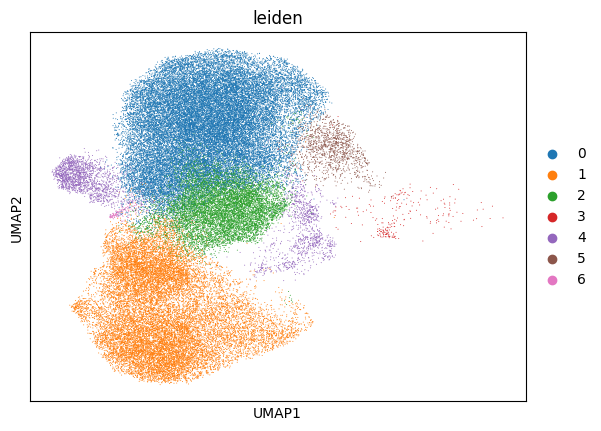

In [43]:
sc.pl.umap(mdata["gex"], color = "leiden")

In [49]:
sc.pp.log1p(mdata["gex"])
sc.pp.pca(mdata["gex"], svd_solver="arpack")
sc.pp.neighbors(mdata["gex"])
sc.tl.umap(mdata["gex"])

In [50]:
ir.pp.index_chains(mdata)
ir.tl.chain_qc(mdata)

In [54]:
mdata

MuData object with n_obs × n_vars = 122357 × 11945
  2 modalities
    gex:	60459 x 11945
      obs:	'_scvi_batch', '_scvi_labels', 'batch', 'batch_id', 'cell_type', 'condition', 'is_doublet', 'is_outlier', 'is_outlier_counts', 'is_outlier_genes', 'is_outlier_mito', 'is_outlier_top_20', 'leiden', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'log1p_total_counts_ribo', 'n_counts', 'n_genes', 'n_genes_by_counts', 'origin', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'sample_id', 'total_counts', 'total_counts_mt', 'total_counts_ribo', 'value', 'outlier', 'mt_outlier', 'ribo_outlier', 'sample'
      uns:	'leiden_colors', 'log1p', 'pca', 'neighbors', 'umap', 'airr:receptor_type_colors'
      obsm:	'X_pca', 'X_scAR', 'X_scVI', 'X_umap', 'X_umap_uncorrected'
      varm:	'PCs'
      layers:	'counts', 'denoised', 'logcounts'
      obsp:	'distances', 'connectivities'
    airr:	71512 x 0
      obs:	'sample', 'group', 'condition', 'receptor_type', 'receptor_subtype', 'chain_pairing'
      uns:	'chain_indices'
      obsm:	'airr', 'chain_indices'

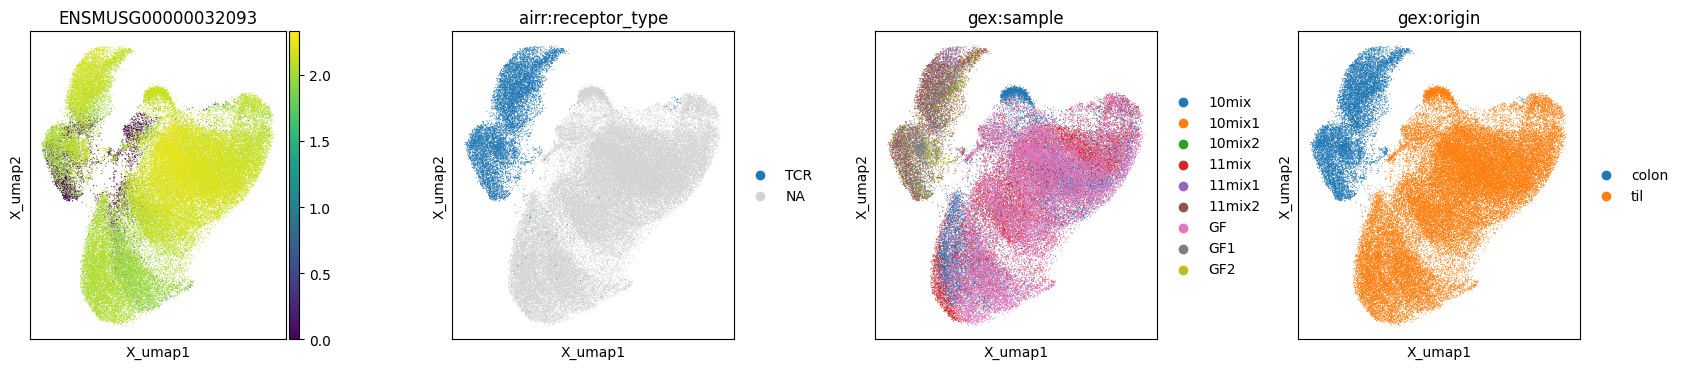

In [91]:
fig, (ax0, ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(20, 4), gridspec_kw={"wspace": 0.5})
mu.pl.embedding(mdata, basis="gex:umap", color=["ENSMUSG00000032093"], ax=ax0, show=False)
mu.pl.embedding(mdata, basis="gex:umap", color=["airr:receptor_type"], ax=ax1, show=False)
mu.pl.embedding(mdata, basis="gex:umap", color=["gex:sample"], ax=ax2, show=False)
mu.pl.embedding(mdata, basis="gex:umap", color=["gex:origin"], ax=ax3)

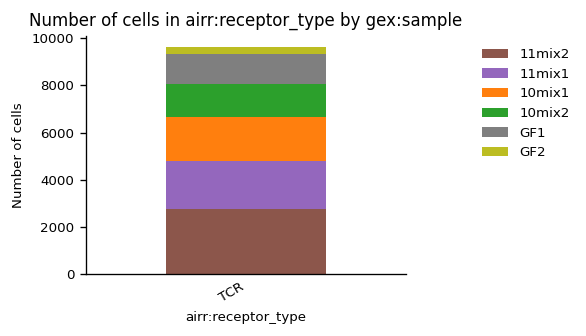

In [78]:
ir.tl.chain_qc(mdata)

_ = ir.pl.group_abundance(
   mdata, groupby="airr:receptor_type", target_col="gex:sample"
)tcr
